In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Capgemini-round2')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
import time

df_electronics_train = pd.read_csv('electronics_train.csv')
df_modcloth_train = pd.read_csv('modcloth_train.csv')

In [3]:
print("list of columns in electronics_train.csv")
print(df_electronics_train.columns)
print("number of rows in electronics_train.csv",df_electronics_train.shape[0])
print("number of columns in electronics_train.csv",df_electronics_train.shape[1])
print("top 5 rows")
df_electronics_train.head()

list of columns in electronics_train.csv
Index(['item_id', 'user_id', 'rating', 'model_attr_x0_Female',
       'model_attr_x0_Female&Male', 'model_attr_x0_Male',
       'category_x0_Accessories & Supplies', 'category_x0_Camera & Photo',
       'category_x0_Car Electronics & GPS',
       'category_x0_Computers & Accessories', 'category_x0_Headphones',
       'category_x0_Home Audio', 'category_x0_Portable Audio & Video',
       'category_x0_Security & Surveillance', 'category_x0_Television & Video',
       'category_x0_Wearable Technology', 'year', 'split', 'user_id_count',
       'item_id_count'],
      dtype='object')
number of rows in electronics_train.csv 1251918
number of columns in electronics_train.csv 20
top 5 rows


,item_id,user_id,rating,model_attr_x0_Female,model_attr_x0_Female&Male,model_attr_x0_Male,category_x0_Accessories & Supplies,category_x0_Camera & Photo,category_x0_Car Electronics & GPS,category_x0_Computers & Accessories,category_x0_Headphones,category_x0_Home Audio,category_x0_Portable Audio & Video,category_x0_Security & Surveillance,category_x0_Television & Video,category_x0_Wearable Technology,year,split,user_id_count,item_id_count
0,0,0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.247198,0,1,118
1,0,1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.247198,0,1,118
2,0,2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.247198,0,1,118
3,0,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.247198,0,1,118
4,0,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-5.247198,0,1,118


In [4]:
print("list of columns in modcloth_train.csv")
print(df_modcloth_train.columns)
print("number of rows in modcloth_train.csv",df_modcloth_train.shape[0])
print("number of columns in modcloth_train.csv",df_modcloth_train.shape[1])
print("top 5 rows")
df_modcloth_train.head()

list of columns in modcloth_train.csv
Index(['item_id', 'user_id', 'rating', 'model_attr_x0_Small',
       'model_attr_x0_Small&Large', 'category_x0_Bottoms',
       'category_x0_Dresses', 'category_x0_Outerwear', 'category_x0_Tops',
       'year', 'split', 'size_x0_0.0', 'size_x0_1.0', 'size_x0_2.0',
       'size_x0_3.0', 'size_x0_4.0', 'size_x0_5.0', 'size_x0_6.0',
       'size_x0_7.0', 'size_x0_8.0', 'size_x0_Unknown Size',
       'fit_x0_Just right', 'fit_x0_Slightly large', 'fit_x0_Slightly small',
       'fit_x0_Unknown Fit', 'fit_x0_Very large', 'fit_x0_Very small',
       'user_attr_x0_Large', 'user_attr_x0_Small',
       'user_attr_x0_Unknown User Attribute', 'user_id_count',
       'item_id_count'],
      dtype='object')
number of rows in modcloth_train.csv 92133
number of columns in modcloth_train.csv 32
top 5 rows


,item_id,user_id,rating,model_attr_x0_Small,model_attr_x0_Small&Large,category_x0_Bottoms,category_x0_Dresses,category_x0_Outerwear,category_x0_Tops,year,split,size_x0_0.0,size_x0_1.0,size_x0_2.0,size_x0_3.0,size_x0_4.0,size_x0_5.0,size_x0_6.0,size_x0_7.0,size_x0_8.0,size_x0_Unknown Size,fit_x0_Just right,fit_x0_Slightly large,fit_x0_Slightly small,fit_x0_Unknown Fit,fit_x0_Very large,fit_x0_Very small,user_attr_x0_Large,user_attr_x0_Small,user_attr_x0_Unknown User Attribute,user_id_count,item_id_count
0,7443,309,4,1.0,0.0,0.0,1.0,0.0,0.0,-1.727919,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,66,1011
1,7443,13009,3,1.0,0.0,0.0,1.0,0.0,0.0,-1.727919,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1011
2,7443,5534,4,1.0,0.0,0.0,1.0,0.0,0.0,-1.727919,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,30,1011
3,7443,1716,4,1.0,0.0,0.0,1.0,0.0,0.0,-1.727919,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1011
4,7443,42071,4,1.0,0.0,0.0,1.0,0.0,0.0,-1.727919,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12,1011


In [5]:
# create the adjacency matrix needed for SVD

# electronics_train.csv

from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix

# create empty lil_matrix
# of size (max(user_id) + 1, max(item_id) + 1)
row_count = max(df_electronics_train.user_id) + 1
col_count = max(df_electronics_train.item_id) + 1
electronics_tr_adj_mat = lil_matrix((row_count,col_count))

# add items from df and load the adjacency matrix
s = time.time()
for i,row in df_electronics_train.iterrows():
    electronics_tr_adj_mat[row.user_id,row.item_id] = row.rating
    
electronics_tr_adj_mat = csr_matrix(electronics_tr_adj_mat)
print("shape of adj matrix (electronics_train.csv): ",electronics_tr_adj_mat.shape)
print("Total time taken in seconds: ", time.time() - s)

shape of adj matrix (electronics_train.csv):  (1157633, 9560)
Total time taken in seconds:  144.3463900089264


In [6]:
# create the adjacency matrix needed for SVD

# modcloth_train.csv

from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix

# create empty lil_matrix
# of size (max(user_id) + 1, max(item_id) + 1)
row_count = max(df_modcloth_train.user_id) + 1
col_count = max(df_modcloth_train.item_id) + 1
modcloth_tr_adj_mat = lil_matrix((row_count,col_count))

# add items from df and load the adjacency matrix
s = time.time()
for i,row in df_modcloth_train.iterrows():
    modcloth_tr_adj_mat[row.user_id,row.item_id] = row.rating
    
modcloth_tr_adj_mat = csr_matrix(modcloth_tr_adj_mat)
print("shape of adj matrix (modcloth_train.csv): ",modcloth_tr_adj_mat.shape)
print("Total time taken in seconds: ", time.time() - s)

shape of adj matrix (modcloth_train.csv):  (44783, 155951)
Total time taken in seconds:  10.877367973327637


In [7]:
# store adjacency matrices to disk

from scipy.sparse import save_npz

save_npz('electronics_tr_adj_mat.npz',electronics_tr_adj_mat)
save_npz('modcloth_tr_adj_mat.npz',modcloth_tr_adj_mat)

In [3]:
# load adjacency matrices from disk
from scipy.sparse import load_npz

electronics_tr_adj_mat = load_npz('electronics_tr_adj_mat.npz')
modcloth_tr_adj_mat = load_npz('modcloth_tr_adj_mat.npz')

print("shape of adj matrix (electronics_train.csv): ",electronics_tr_adj_mat.shape)

print()

print("shape of adj matrix (modcloth_train.csv): ",modcloth_tr_adj_mat.shape)

shape of adj matrix (electronics_train.csv):  (1157633, 9560)

shape of adj matrix (modcloth_train.csv):  (44783, 155951)


In [4]:
# electronics_train.csv

# SVD decomposition

from scipy.sparse.linalg import svds

matrix = electronics_tr_adj_mat
s = time.time()
U_electronics, Sigma_electronics, VT_electronics = svds(matrix, k=25)
print("Time taken in seconds (electronics_train.csv): ",time.time() - s)

print(U_electronics.shape)
print(Sigma_electronics.shape)
print(VT_electronics.T.shape)

Time taken in seconds (electronics_train.csv):  3.3470821380615234
(1157633, 25)
(25,)
(9560, 25)


In [5]:
# modcloth_train.csv

# SVD decomposition

from scipy.sparse.linalg import svds

matrix = modcloth_tr_adj_mat
s = time.time()
U_modcloth, Sigma_modcloth, VT_modcloth = svds(matrix, k=25)
print("Time taken in seconds (modcloth_train.csv): ",time.time() - s)

print(U_modcloth.shape)
print(Sigma_modcloth.shape)
print(VT_modcloth.T.shape)

Time taken in seconds (modcloth_train.csv):  0.8627572059631348
(44783, 25)
(25,)
(155951, 25)


In [6]:
# function to calculate derivative of B at each point

#def derivative_db(user_id,item_id,rating,U,V,mu,alpha,B,C):
def derivative_db(user_id,item_id,rating,U,V,alpha,B,C):
    '''In this function, we will compute dL/db_i'''

    # since everything other than bi can be considered as constant
    # dl/dbi = alpha*2bi - 2(yij - mu - bi - cj - ui.T.vj))
    # where bi => value in b_i for the user user_id
    # cj => value in c_j for item item_id
    # yij => rating
    # ui => k dim column vector corresponding to user_id => U[user_id].T
    # vj => k dim column vector corresponding to item_id => V[:,item_id]

    # calculate bi and cj
    bi = float(B[user_id])
    cj = float(C[item_id])

    # calculate ui and vj
    ui = U[user_id].T
    vj = V[:,item_id]

    #print(np.matmul(ui,vj))

    #dL_dbi = (alpha*2)*bi - 2*(rating - mu - bi - cj - float(np.matmul(ui.T,vj)))
    dL_dbi = (alpha*2)*bi - 2*(rating - bi - cj - float(np.matmul(ui.T,vj)))

    #print(dL_dbi)
    #print(type(dL_dbi))
    return dL_dbi 

In [7]:
#def derivative_dc(user_id,item_id,rating,U,V,mu,alpha,B,C):
def derivative_dc(user_id,item_id,rating,U,V,alpha,B,C):
    '''In this function, we will compute dL/dc_j'''
    
    # since everything other than cj can be considered as constant
    # dl/dcj = alpha*2cj - 2(yij - mu - bi - cj - ui.T.vj))
    # where bi => value in b_i for the user user_id
    # cj => value in c_j for item item_id
    # yij => rating
    # ui => k dim column vector corresponding to user_id => U[user_id].T
    # vj => k dim column vector corresponding to item_id => V[:,item_id]

    #calculate bi and cj
    bi = float(B[user_id])
    cj = float(C[item_id])

    #calculate ui and vj
    ui = U[user_id].T
    vj = V[:,item_id]

    #print(np.matmul(ui,vj))

    #dL_dcj = (alpha*2)*cj - 2*(rating - mu - bi - cj - float(np.matmul(ui.T,vj)))
    dL_dcj = (alpha*2)*cj - 2*(rating - bi - cj - float(np.matmul(ui.T,vj)))    

    #print(dL_dcj)
    #print(type(dL_dcj))
    return dL_dcj 
    

In [8]:
# split into training and CV datasets

from sklearn.model_selection import train_test_split

# electronics.csv

# keep the data that has unique user_id or item_id
df_electronics_train_compulsory = df_electronics_train.loc[(df_electronics_train['item_id_count'] == 1) | (df_electronics_train['user_id_count'] == 1)]
# use the data that has repeated user_id and item_id for splitting
df_electronics_train_split = df_electronics_train.loc[(df_electronics_train['item_id_count'] > 1) & (df_electronics_train['user_id_count'] > 1)]

df_electronics_tr,df_electronics_cv = train_test_split(df_electronics_train_split,test_size=0.75,shuffle = False)

# append the compulsory data
df_electronics_tr = pd.concat([df_electronics_tr, df_electronics_train_compulsory], 
                                 ignore_index=True)

print("electronics.csv")
print("Size of training dataset: ",df_electronics_tr.shape[0])
print("Size of CV dataset: ",df_electronics_cv.shape[0])
print("Effective train ratio: ",df_electronics_tr.shape[0]/df_electronics_train.shape[0])
print("Effective CV ratio: ",df_electronics_cv.shape[0]/df_electronics_train.shape[0])

print()

# modcloth.csv

# keep the data that has unique user_id or item_id
df_modcloth_train_compulsory = df_modcloth_train.loc[(df_modcloth_train['item_id_count'] == 1) | (df_modcloth_train['user_id_count'] == 1)]
# use the data that has repeated user_id and item_id for splitting
df_modcloth_train_split = df_modcloth_train.loc[(df_modcloth_train['item_id_count'] > 1) & (df_modcloth_train['user_id_count'] > 1)]

df_modcloth_tr,df_modcloth_cv = train_test_split(df_modcloth_train_split,test_size=0.3,shuffle = False)

# append the compulsory data
df_modcloth_tr = pd.concat([df_modcloth_tr, df_modcloth_train_compulsory], 
                                 ignore_index=True)

print("modcloth.csv")
print("Size of training dataset: ",df_modcloth_tr.shape[0])
print("Size of CV dataset: ",df_modcloth_cv.shape[0])
print("Effective train ratio: ",df_modcloth_tr.shape[0]/df_modcloth_train.shape[0])
print("Effective CV ratio: ",df_modcloth_cv.shape[0]/df_modcloth_train.shape[0])

electronics.csv
Size of training dataset:  1104098
Size of CV dataset:  147820
Effective train ratio:  0.8819251740129944
Effective CV ratio:  0.11807482598700554

modcloth.csv
Size of training dataset:  73587
Size of CV dataset:  18546
Effective train ratio:  0.7987040474097229
Effective CV ratio:  0.2012959525902771


In [9]:
# train : use SGD and learn the values of B and C for both datasets

# electronics_train.csv

n_epoch = 0
next_epoch = True
alpha = 0.1
learning_rate = 0.001

B_electronics = np.zeros(electronics_tr_adj_mat.shape[0])
C_electronics = np.zeros(electronics_tr_adj_mat.shape[1])
mse_list_electronics = []
mse_list_electronics_cv = []

# for each epoch
while next_epoch == True:
    s = time.time()
    n_epoch += 1
    # init list of mse for each point
    sq_error_list = []
    # for each pair of user,movie
    for i,row in df_electronics_tr.iterrows():

        # initialize user_id,item_id and rating
        user_id = int(row.user_id)
        item_id = int(row.item_id)
        rating = row.rating
        
        # initialize bi and cj
        bi = B_electronics[user_id]
        cj = C_electronics[item_id]

        # find the next value of bi and cj
        bi = bi - learning_rate * derivative_db(user_id,item_id,rating,U_electronics,VT_electronics,
                                                alpha,B_electronics,C_electronics)
        cj = cj - learning_rate * derivative_dc(user_id,item_id,rating,U_electronics,VT_electronics,
                                                alpha,B_electronics,C_electronics)


        # update the matrix
        B_electronics[user_id] = bi
        C_electronics[item_id] = cj

        # predict the rating with above values 
        rating_hat = bi + cj + float(np.matmul(U_electronics[user_id],VT_electronics[:,item_id]))

        # append mse
        sq_error_list.append((rating - rating_hat)**2)

    ##=====================end of loop over rows of data===========================##

    # calculate validation error
    sq_error_list_cv = []
    for i,row in df_electronics_cv.iterrows():

        # initialize user_id,item_id and rating
        user_id = int(row.user_id)
        item_id = int(row.item_id)
        rating = row.rating

        # initialize bi and cj
        bi = B_electronics[user_id]
        cj = C_electronics[item_id]

        # predict the rating with above values 
        rating_hat = bi + cj + float(np.matmul(U_electronics[user_id],VT_electronics[:,item_id]))

        # append mse
        sq_error_list_cv.append((rating - rating_hat)**2)

    ##================================end of for loop over validation data==============================##

    #append training and cv mse for this epoch
    training_mse = np.mean(np.array(sq_error_list))
    cv_mse = np.mean(np.array(sq_error_list_cv))
    
    mse_list_electronics.append(training_mse)
    mse_list_electronics_cv.append(cv_mse)    
    
    print('Epoch ',str(n_epoch),' completed. Training MSE : ',training_mse,' CV MSE: ',cv_mse)
    print("Time taken (in seconds) : ", time.time() - s)

    #terminating condition
    if n_epoch == 100:
        next_epoch = False
###=========================end of loop over epochs=================================###

Epoch  1  completed. Training MSE :  8.834606945033203  CV MSE:  6.52695979262322
Time taken (in seconds) :  118.18152928352356
Epoch  2  completed. Training MSE :  5.094456198574702  CV MSE:  4.835920327447913
Time taken (in seconds) :  118.2122151851654
Epoch  3  completed. Training MSE :  4.066284480070534  CV MSE:  4.07623575892117
Time taken (in seconds) :  117.86980128288269
Epoch  4  completed. Training MSE :  3.5363850144690785  CV MSE:  3.632289559165314
Time taken (in seconds) :  116.66455030441284
Epoch  5  completed. Training MSE :  3.2048730484938677  CV MSE:  3.337203882681481
Time taken (in seconds) :  116.43844032287598
Epoch  6  completed. Training MSE :  2.9747653755412973  CV MSE:  3.1252588259992917
Time taken (in seconds) :  116.7497010231018
Epoch  7  completed. Training MSE :  2.8041110733764274  CV MSE:  2.964864191454964
Time taken (in seconds) :  116.2383987903595
Epoch  8  completed. Training MSE :  2.6715417124276546  CV MSE:  2.8388183913084193
Time taken (

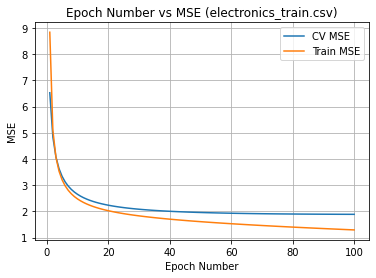

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1,n_epoch+1),mse_list_electronics_cv,label = 'CV MSE')
plt.plot(range(1,n_epoch+1),mse_list_electronics,label = 'Train MSE')
plt.title('Epoch Number vs MSE (electronics_train.csv)')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

In [15]:
# modcloth_train.csv

n_epoch = 0
next_epoch = True
alpha = 0.1
learning_rate = 0.001

B_modcloth = np.zeros(modcloth_tr_adj_mat.shape[0])
C_modcloth = np.zeros(modcloth_tr_adj_mat.shape[1])
mse_list_modcloth = []
mse_list_modcloth_cv = []

# for each epoch
while next_epoch == True:
    s = time.time()
    n_epoch += 1
    # init list of mse for each point
    sq_error_list = []
    # for each pair of user,movie
    for i,row in df_modcloth_tr.iterrows():

        # initialize user_id,item_id and rating
        user_id = int(row.user_id)
        item_id = int(row.item_id)
        rating = row.rating
        
        # initialize bi and cj
        bi = B_modcloth[user_id]
        cj = C_modcloth[item_id]

        # find the next value of bi and cj
        bi = bi - learning_rate * derivative_db(user_id,item_id,rating,U_modcloth,VT_modcloth,
                                                alpha,B_modcloth,C_modcloth)
        cj = cj - learning_rate * derivative_dc(user_id,item_id,rating,U_modcloth,VT_modcloth,
                                                alpha,B_modcloth,C_modcloth)


        # update the matrix
        B_modcloth[user_id] = bi
        C_modcloth[item_id] = cj

        # predict the rating with above values 
        rating_hat = bi + cj + float(np.matmul(U_modcloth[user_id],VT_modcloth[:,item_id]))

        # append mse
        sq_error_list.append((rating - rating_hat)**2)

    ##=====================end of loop over rows of data===========================##

    # calculate validation error
    sq_error_list_cv = []
    for i,row in df_modcloth_cv.iterrows():

        # initialize user_id,item_id and rating
        user_id = int(row.user_id)
        item_id = int(row.item_id)
        rating = row.rating

        # initialize bi and cj
        bi = B_modcloth[user_id]
        cj = C_modcloth[item_id]

        # predict the rating with above values 
        rating_hat = bi + cj + float(np.matmul(U_modcloth[user_id],VT_modcloth[:,item_id]))

        # append mse
        sq_error_list_cv.append((rating - rating_hat)**2)

    ##================================end of for loop over validation data==============================##

    #append training and cv mse for this epoch
    training_mse = np.mean(np.array(sq_error_list))
    cv_mse = np.mean(np.array(sq_error_list_cv))
    
    mse_list_modcloth.append(training_mse)
    mse_list_modcloth_cv.append(cv_mse)    
    
    print('Epoch ',str(n_epoch),' completed. Training MSE : ',training_mse,' CV MSE: ',cv_mse)
    print("Time taken (in seconds) : ", time.time() - s)

    #terminating condition
    if n_epoch == 150:
        next_epoch = False
###=========================end of loop over epochs=================================###

Epoch  1  completed. Training MSE :  9.369108124223054  CV MSE:  12.150259890303422
Time taken (in seconds) :  8.761533498764038
Epoch  2  completed. Training MSE :  4.177760603733251  CV MSE:  10.58224721263404
Time taken (in seconds) :  8.619603633880615
Epoch  3  completed. Training MSE :  3.0559006012527092  CV MSE:  9.760832703939567
Time taken (in seconds) :  8.772141695022583
Epoch  4  completed. Training MSE :  2.587722317480732  CV MSE:  9.204744637699463
Time taken (in seconds) :  8.718751907348633
Epoch  5  completed. Training MSE :  2.3299828536804625  CV MSE:  8.780558322880344
Time taken (in seconds) :  8.561514377593994
Epoch  6  completed. Training MSE :  2.163789787877419  CV MSE:  8.434976667001989
Time taken (in seconds) :  8.600326776504517
Epoch  7  completed. Training MSE :  2.04521544037603  CV MSE:  8.14189529544499
Time taken (in seconds) :  8.593843936920166
Epoch  8  completed. Training MSE :  1.9546277907975191  CV MSE:  7.886682777927509
Time taken (in seco

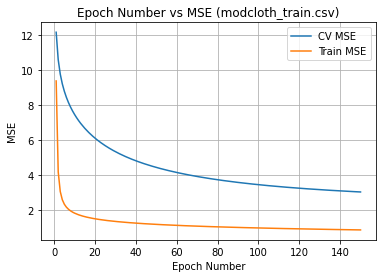

In [17]:
# view graphically

import matplotlib.pyplot as plt

plt.plot(range(1,n_epoch+1),mse_list_modcloth_cv,label = 'CV MSE')
plt.plot(range(1,n_epoch+1),mse_list_modcloth,label = 'Train MSE')
plt.title('Epoch Number vs MSE (modcloth_train.csv)')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Test data score

df_electronics_test = pd.read_csv('electronics_test.csv')
df_modcloth_test = pd.read_csv('modcloth_test.csv')


# electronics_test.csv
sq_error_list_test = []
for i,row in df_electronics_test.iterrows():

    # initialize user_id,item_id and rating
    user_id = int(row.user_id)
    item_id = int(row.item_id)
    rating = row.rating

    # initialize bi and cj
    bi = B_electronics[user_id]
    cj = C_electronics[item_id]

    # predict the rating with above values 
    rating_hat = bi + cj + float(np.matmul(U_electronics[user_id],VT_electronics[:,item_id]))

    # append mse
    sq_error_list_test.append((rating - rating_hat)**2)

print("Test MSE for electronics :",np.mean(sq_error_list_test))

Test MSE for electronics : 1.8787370354108672


In [32]:
# modcloth_test.csv
sq_error_list_test = []
for i,row in df_modcloth_test.iterrows():

    # initialize user_id,item_id and rating
    user_id = int(row.user_id)
    item_id = int(row.item_id)
    rating = row.rating

    # initialize bi and cj
    bi = B_modcloth[user_id]
    cj = C_modcloth[item_id]

    # predict the rating with above values 
    rating_hat = bi + cj + float(np.matmul(U_modcloth[user_id],VT_modcloth[:,item_id]))

    # append mse
    sq_error_list_test.append((rating - rating_hat)**2)

print("Test MSE for modcloth :",np.mean(sq_error_list_test))

Test MSE for modcloth : 1.8352438109354094
